# Linear Regression and Learning Curve Challenges

In [1]:
import pandas as pd
import numpy as np
import pickle
import random

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/cneiderer/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Challenge 1

Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (`log(x)`)

(The second one should fit really well, since it has the same form as the underlying model!)

### Generate Data

/home/cneiderer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


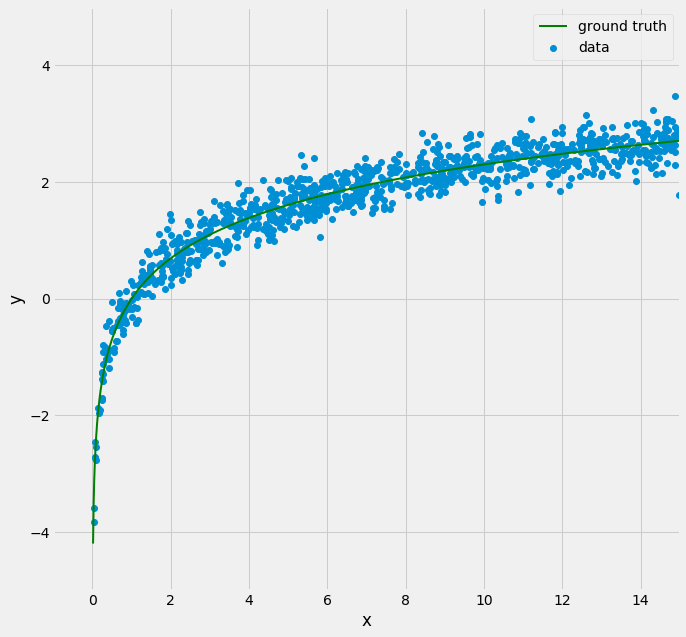

In [2]:
from IPython.core.pylabtools import figsize
figsize(10, 10)
plt.style.use('fivethirtyeight')

np.random.seed(129)

def f(x):
    return np.log(x)

n_samples = 1000
# Generate the x values from the random uniform distribution between 0 and 1
X = np.random.uniform(0, 15, size=n_samples)
# Generate the y values by taking the sin and adding a random Gaussian (normal) noise term
y = f(X) + np.random.normal(scale=0.25, size=n_samples)

x_plot = np.linspace(0, 15, n_samples)
# Plot the training data against what we know to be the ground truth sin function
fig, ax = plt.subplots(1,1);
ax.plot(x_plot, f(x_plot), label='ground truth', color='green', lw=2)
ax.scatter(X, y, label='data', lw=1)
ax.set_ylim((-5, 5))
ax.set_xlim((-1, 15))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

### Create Features

In [3]:
df = pd.DataFrame([np.array(y), np.array(X)], index=['Y', 'X']).T

In [4]:
df['X_2'] = df['X'] ** 2
df['Log_X'] = df['X'].map(np.log)

### Fit Polynomial Model

In [5]:
# Generate Design Matrices
y, X = patsy.dmatrices('Y ~ X_2', data=df, return_type="dataframe")
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1161.
Date:                Wed, 31 Jan 2018   Prob (F-statistic):          2.06e-169
Time:                        17:39:09   Log-Likelihood:                -1031.5
No. Observations:                1000   AIC:                             2067.
Df Residuals:                     998   BIC:                             2077.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8996      0.031     28.625      0.000       0.838       0.961
X_2            0.0108      0.000     34.073      0.000       0.010       0.011
==============================================================================
Omnibus:                      504.463   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3788.002
Skew:                          -2.199   Prob(JB):                         0.00
Kurtosis:                      11.460   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Fit Log Model

In [6]:
# Generate Design Matrices
y, X = patsy.dmatrices('Y ~ Log_X', data=df, return_type="dataframe")
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.522e+04
Date:                Wed, 31 Jan 2018   Prob (F-statistic):               0.00
Time:                        17:39:10   Log-Likelihood:                -23.206
No. Observations:                1000   AIC:                             50.41
Df Residuals:                     998   BIC:                             60.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0064      0.016      0.407      0.684      -0.024       0.037
Log_X          0.9963      0.008    123.381      0.000       0.980       1.012
==============================================================================
Omnibus:                        1.625   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                1.500
Skew:                           0.087   Prob(JB):                        0.472
Kurtosis:                       3.078   Cond. No.                         4.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
fit.

SyntaxError: invalid syntax (<ipython-input-7-227f6453c3bc>, line 1)

## Challenge 2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)

### Generate Data

In [ ]:
from IPython.core.pylabtools import figsize
figsize(10, 10)
plt.style.use('fivethirtyeight')

np.random.seed(129)

def f(x):
    return x + x ** 2

n_samples = 1000
# Generate the x values from the random uniform distribution between 0 and 1
X2 = np.random.uniform(-12, 12, size=n_samples)
# Generate the y values by taking the sin and adding a random Gaussian (normal) noise term
y2 = f(X2) + np.random.normal(scale=5, size=n_samples)

x_plot = np.linspace(-10, 10, n_samples)
# Plot the training data against what we know to be the ground truth sin function
fig, ax = plt.subplots(1,1);
ax.plot(x_plot, f(x_plot), label='ground truth', color='green', lw=2)
ax.scatter(X2, y2, label='data', lw=1)
ax.set_ylim((-10, 100))
ax.set_xlim((-12, 12))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

### Create Features

In [ ]:
df2 = pd.DataFrame([np.array(y), np.array(X)], index=['Y', 'X']).T

In [ ]:
df2['X_2'] = df['X'] ** 2
df2['Intercept'] = np.ones((len(df2), 1))

### Split Data

In [ ]:
# Split data
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2[['Intercept', 'X', 'X_2']], df['Y'], 
                                                        test_size=0.3, random_state=129)

In [ ]:
lr = LinearRegression(fit_intercept=True, normalize=False)
lr.fit(X_train2, y_train2)
lr.score(X_test2, y_test2)

In [ ]:
print('MSE Training:', mean_squared_error(y_train2, lr.predict(X_train2)))
print('MSE Test:', mean_squared_error(y_test2, lr.predict(X_test2)))

## Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC

## Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

JB: Good start!